In [4]:
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras import layers
import keras
vocab_size= 10000
num_tags= 100
num_departments=4

title= Input(shape=(vocab_size,),name='title' ) #입력 정의
text_body= Input(shape=(vocab_size,),name='text_body' )
tags= Input(shape=(num_tags,),name='tags' )

features=layers.Concatenate()([title,text_body,tags]) #입력특성을 하나의 텐서 feature로 연결 
features=layers.Dense(64, activation='relu')(features) #중간층으로 재결합

priority=layers.Dense(1, activation='sigmoid', name='priority')(features)  #출력 정의 
department=layers.Dense(num_departments, activation='softmax', name='department')(features)
model=keras.Model(inputs=[title, text_body, tags], #입출력 지정
                 outputs=[priority, department])

In [5]:
#입력과 타겟 배열 리스트를 전달하여 모델 훈련 
import numpy as np
num_samples=1280

title_data= np.random.randint(0,2,size=(num_samples, vocab_size))
text_body_data= np.random.randint(0,2,size=(num_samples, vocab_size))
tags_data= np.random.randint(0,2,size=(num_samples, num_tags))  #dummy 입력 데이터 

priority_data= np.random.random(size=(num_samples,1))
department_data= np.random.randint(0,2,size=(num_samples, num_departments)) #더미 타겟 

model.compile(optimizer ='rmsprop', 
             loss =['mean_squared_error','categorical_crossentropy'],
             metrics=[['mean_absolute_error'],['accuracy']])

model.fit([title_data,text_body_data, tags_data], #데이터 리스트는 model 클래스에 전달한 순서와 같아야한다. 
          [priority_data,department_data],
                   epochs=1)

model.evaluate([title_data,text_body_data, tags_data],
          [priority_data,department_data])
prioridy_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


In [6]:
import keras
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"] #딕셔너리로 전달 
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department 

In [7]:
model=CustomerTicketModel(num_departments=4)
priority,department= model({'title':title_data,'text_body': text_body_data, 'tags':
                           tags_data})

In [8]:
import pydot
import graphviz

In [9]:
import keras
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:

model.compile(optimizer ='rmsprop', 
             loss =['mean_squared_error','categorical_crossentropy'],
             metrics=[['mean_absolute_error'],['accuracy']])

model.fit({'title':title_data,'text_body': text_body_data, 'tags':
                           tags_data},
         [priority_data, department_data], 
         epochs=1)

model.evaluate ({'title':title_data,'text_body': text_body_data, 'tags':
                           tags_data},
         [priority_data, department_data])

priority_preds, department_preds = model.predict ({'title':title_data,'text_body': text_body_data, 'tags':
                           tags_data})

40/40 [==============================] - 0s 4ms/step


In [11]:

from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000] #검증데이터 활용 
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,epochs=3, #default ) batch_size =32
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2962 - accuracy: 0.9125 - val_loss: 0.1444 - val_accuracy: 0.9591
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1631 - accuracy: 0.9530 - val_loss: 0.1248 - val_accuracy: 0.9665
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

In [15]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2977 - accuracy: 0.9110 - rmse: 7.1733 - val_loss: 0.1506 - val_accuracy: 0.9564 - val_rmse: 7.3554
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1615 - accuracy: 0.9529 - rmse: 7.3485 - val_loss: 0.1106 - val_accuracy: 0.9702 - val_rmse: 7.3995
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9753 - rmse: 7.4315


### 콜백

In [16]:
- early stopping , modelchecpoint

SyntaxError: invalid syntax (216804964.py, line 1)

In [20]:
model.save('my_model.h5')


In [22]:
my_model= keras.models.load_model('my_model.h5')

In [23]:
my_model.predict(test_images[0:1])

1/1 [==============================] - 0s 46ms/step


array([[4.4862988e-10, 1.2903024e-11, 2.7324174e-07, 3.9113877e-07,
        4.3070392e-14, 7.6910567e-10, 3.3541960e-15, 9.9999940e-01,
        1.5795289e-10, 1.2475707e-08]], dtype=float32)

In [24]:
callbacks_list = [
    keras.callbacks.EarlyStopping( #성능향상 멈추면 훈련 중지
        monitor="val_accuracy", #검증 정확도 모니터링
        patience=2, #두번 에포크동안 정확도가 향상 되지 않으면 훈련 중지
    ),
    keras.callbacks.ModelCheckpoint( #매 에포크 끝에서 현재 가중치 저장
        filepath="checkpoint_path.keras", #filepath = 파일이름
        monitor="val_loss", #val_loss가 좋아지지 않으면 모델파일을 덮어쓰지 않음
        save_best_only=True, #가장 좋은 모델만 저장 
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) #정확도 모니터링 하므로 모델 지표 포함
model.fit(train_images, train_labels, #콜백이 검증 손실과 검증정확도 모니터링 fit 호출할때
          epochs=10,
          callbacks=callbacks_list,#validation_data 매개변수로 검증 데이터 전달 ,학습 후 항상 모델을 수동으로 저장 
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2962 - accuracy: 0.9110 - val_loss: 0.1491 - val_accuracy: 0.9570
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1601 - accuracy: 0.9531 - val_loss: 0.1167 - val_accuracy: 0.9672
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1333 - accuracy: 0.9620 - val_loss: 0.1067 - val_accuracy: 0.9695
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1147 - accuracy: 0.9683 - val_loss: 0.0929 - val_accuracy: 0.9766
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1016 - accuracy: 0.9715 - val_loss: 0.0986 - val_accuracy: 0.9757
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0946 - accuracy: 0.9740 - val_loss: 0.0989 - val_accuracy: 0.9773
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0879 - accuracy: 0.9761 - val_loss: 0.0939 - val_accuracy:

In [25]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 144F-541F

 C:\Users\user 디렉터리

2023-06-21  오전 10:53    <DIR>          .
2023-05-01  오전 08:30    <DIR>          ..
2023-06-20  오후 03:42    <DIR>          .cache
2023-06-21  오전 10:34    <DIR>          .conda
2023-03-24  오전 11:12                25 .condarc
2023-03-24  오전 11:12    <DIR>          .continuum
2023-03-09  오후 12:09    <DIR>          .idlerc
2023-06-21  오전 09:36    <DIR>          .ipynb_checkpoints
2023-03-09  오후 12:37    <DIR>          .ipython
2023-03-10  오전 09:12    <DIR>          .jupyter
2023-06-12  오후 02:14    <DIR>          .keras
2023-03-09  오후 03:51    <DIR>          .matplotlib
2023-02-28  오전 09:07    <DIR>          .ms-ad
2023-04-06  오전 09:20    <DIR>          .pydataset
2023-03-24  오전 11:43    <DIR>          .spyder-py3
2023-05-11  오후 03:46    <DIR>          .surprise_data
2023-06-12  오후 03:21            24,057 0612 keras.ipynb
2023-06-14  오후 12:30            10,911 0613.ipynb
2023-06-15  오전 10:30           137,776 0614.ipynb
2023-

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2930 - accuracy: 0.9123 - val_loss: 0.1532 - val_accuracy: 0.9573
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1596 - accuracy: 0.9543 - val_loss: 0.1116 - val_accuracy: 0.9692
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1280 - accuracy: 0.9631 - val_loss: 0.1118 - val_accuracy: 0.9701
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1155 - accuracy: 0.9678 - val_loss: 0.1013 - val_accuracy: 0.9738
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1051 - accuracy: 0.9705 - val_loss: 0.1020 - val_accuracy: 0.9755
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0992 - accuracy: 0.9731 - val_loss: 0.0959 - val_accuracy: 0.9778
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0871 - accuracy: 0.9761 - val_loss: 0.0958 - val_accuracy:

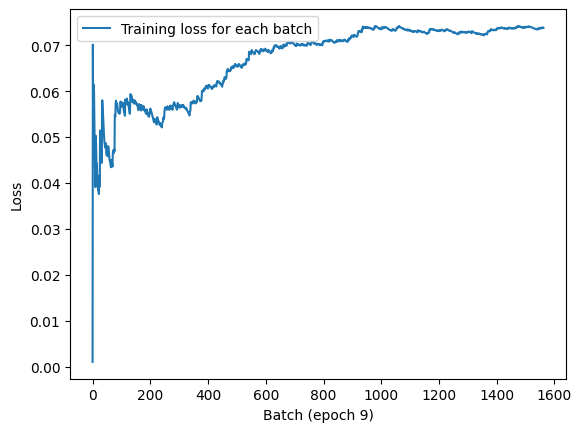

In [30]:
model=get_mnist_model()
model.compile(optimizer ='rmsprop', 
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10,callbacks=[LossHistory()],
         validation_data=(val_images, val_labels))

In [29]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [31]:
!tensorboard

Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.


In [32]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2963 - accuracy: 0.9128 - val_loss: 0.1419 - val_accuracy: 0.9592
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1612 - accuracy: 0.9547 - val_loss: 0.1123 - val_accuracy: 0.9684
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1307 - accuracy: 0.9641 - val_loss: 0.1076 - val_accuracy: 0.9709
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1158 - accuracy: 0.9681 - val_loss: 0.0944 - val_accuracy: 0.9758
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1056 - accuracy: 0.9707 - val_loss: 0.0958 - val_accuracy: 0.9756
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0943 - accuracy: 0.9741 - val_loss: 0.0912 - val_accuracy: 0.9763
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0870 - accuracy: 0.9762 - val_loss: 0.0932 - val_accuracy:

In [33]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

### 합성곱 신경망

- 간단한 컨브넷

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1)) #height, width, channels 3차원 = 이미지 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         738

### 측정 지표의 저수준 사용법

In [36]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions) 
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [37]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean() #keras.metrixs.Mean() 을 사용해 스칼라값 평균 추적 
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


### 완전한 훈련과 평가루프

In [38]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [39]:
#지표 재설정 
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [40]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9133
...loss: 0.2905
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9535
...loss: 0.1608
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9638
...loss: 0.1326


In [41]:
#단계뼐 평가 루파 작성
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9669
...val_loss: 0.1193


### - 생각보다느림 tf.function 성능높이기

In [42]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9669
...val_loss: 0.1193
